# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [57]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2022-06-29 17:35:28.695703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-29 17:35:28.721357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-29 17:35:28.721526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
PATH = ('/home/gael/Desktop/PetImages')

In [5]:
import cv2
import imghdr

In [34]:
from PIL import Image

In [36]:
for image_class in os.listdir(PATH): 
    for image in os.listdir(os.path.join(PATH, image_class)):
        image_path = os.path.join(PATH, image_class, image)
        try: 
            im = Image.open(image_path)
            rgb_im = im.convert('RGB')
            rgb_im.save(f'{image_path[:-4]}.jpg')
            if tip not in image_exts or image in cat_images or image in dog_images: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

/home/gael/Desktop/git-repos/notebooks/convolutional_nueral_networks/env/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


# Loading and Formating the Data
- create a dataframe
- split into train test and validate
- format the data

In [37]:
data = tf.keras.utils.image_dataset_from_directory(PATH)

Found 24911 files belonging to 2 classes.


In [38]:
data_iterator = data.as_numpy_iterator()

In [39]:
batch = data_iterator.next()

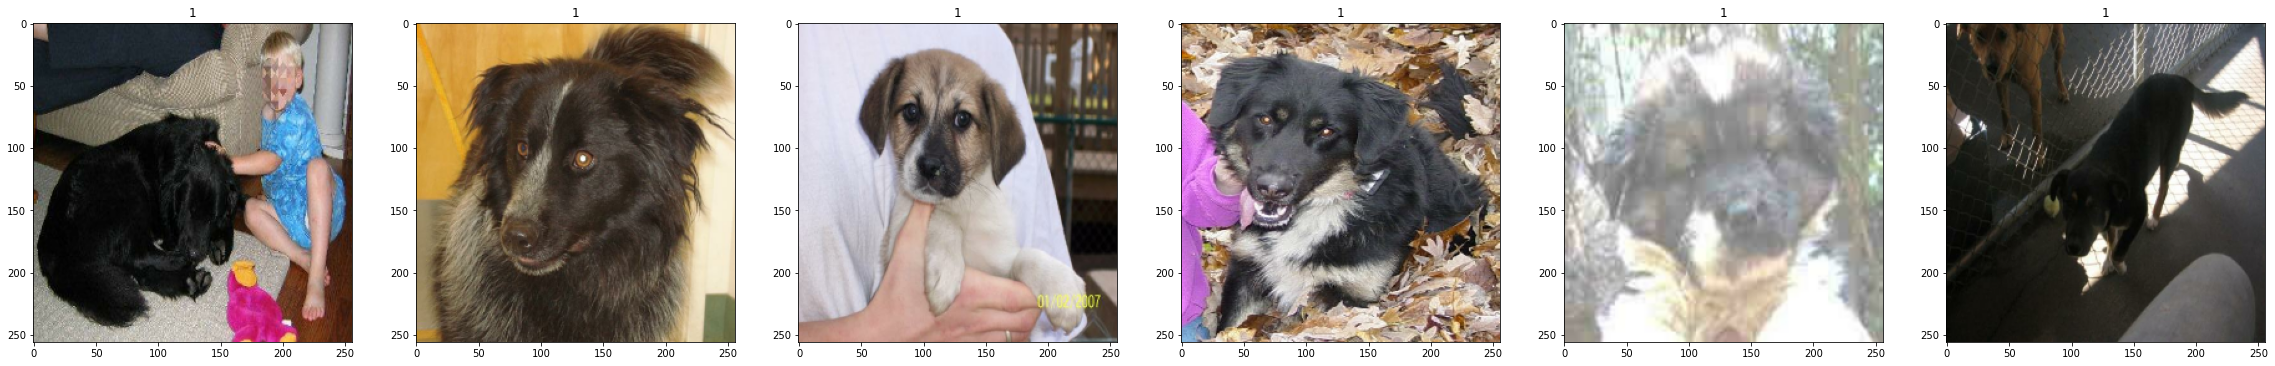

In [40]:
fig, ax = plt.subplots(ncols=6, figsize=(40,40))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# How CNN's Work
- What is convolution
- What is a filter/kernel
- Max/Min pooling
- How do we get prediction

# Creating the Model

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [48]:
logdir='logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
545/545 [==============================] - 180s 331ms/step - loss: 0.6646 - accuracy: 0.5974 - val_loss: 0.5841 - val_accuracy: 0.6970
Epoch 2/20
545/545 [==============================] - 21s 39ms/step - loss: 0.5609 - accuracy: 0.7120 - val_loss: 0.5501 - val_accuracy: 0.7300
Epoch 3/20
545/545 [==============================] - 39s 72ms/step - loss: 0.4842 - accuracy: 0.7658 - val_loss: 0.5411 - val_accuracy: 0.7296
Epoch 4/20
545/545 [==============================] - 39s 70ms/step - loss: 0.3907 - accuracy: 0.8209 - val_loss: 0.5555 - val_accuracy: 0.7500
Epoch 5/20
545/545 [==============================] - 19s 35ms/step - loss: 0.2474 - accuracy: 0.8955 - val_loss: 0.6407 - val_accuracy: 0.7536
Epoch 6/20
545/545 [==============================] - 19s 35ms/step - loss: 0.1253 - accuracy: 0.9531 - val_loss: 0.8610 - val_accuracy: 0.7522
Epoch 7/20
545/545 [==============================] - 19s 35ms/step - loss: 0.0710 - accuracy: 0.9756 - val_loss: 1.0321 - val_accurac

# Analyzing Performence

# What Does the CNN See?

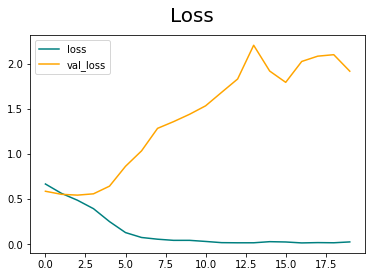

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

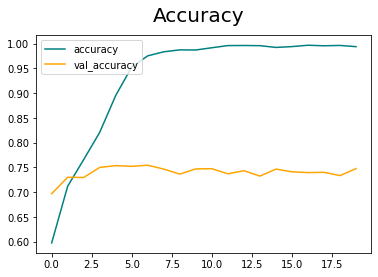

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [53]:
import cv2

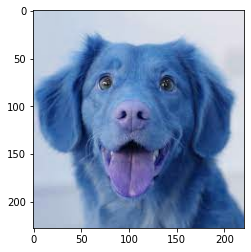

In [54]:
img = cv2.imread('/home/gael/Downloads/download.jpeg')
plt.imshow(img)
plt.show()

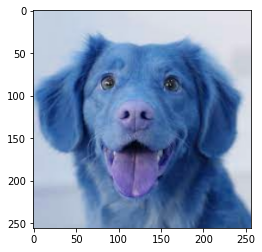

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 228ms/step


In [61]:
if yhat > 0.5: 
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is dog


In [60]:
yhat

array([[0.9997583]], dtype=float32)

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join('models','CatDogClassifier.h5'))

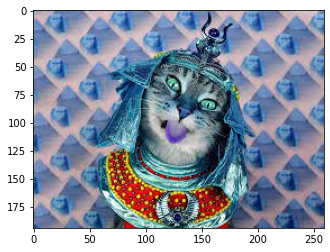

In [64]:
cat_img = cv2.imread('/home/gael/Downloads/cat.jpeg')
plt.imshow(cat_img)
plt.show()

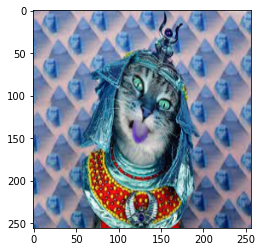

In [66]:
resize_cat = tf.image.resize(cat_img, (256,256))
plt.imshow(resize_cat.numpy().astype(int))
plt.show()

In [67]:
yhat_cat = model.predict(np.expand_dims(resize_cat/255, 0))

1/1 [==============================] - 0s 21ms/step


In [68]:
if yhat_cat > 0.5: 
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat
